In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

[메모]

(210, 164, 74) 플레이어 <br>
(187, 187, 53) 대기 플레이어 <br>
(0, 28, 136) 도로 <br>
(228, 111, 111) 벽 & 과자 <br>
(198, 89, 179) 분홍 유령 <br>
(180, 122, 48) 노랑 유령 <br>
(200, 72, 27) 빨강 유령 <br>
(84, 184, 153) 하늘 유령 <br>
(184, 50, 50) 체리 <br>
(195, 144, 61) 점수<br>

게임 자체에서 유령들이 지맘대로 움직임

### Function

In [3]:
def colored(r, g, b, text):
    return '\033[1m' + "\033[38;2;{};{};{}m{} \033[38;2;255;255;255m".format(r, g, b, text)

### Play

In [16]:
from dqn import *

env = Environment()
state = env.reset()

# init part
parameter = HyperParameter(
    batch_size=32,  # 한 학습당 사용되는 데이터 개수 (batch 크기)
    buffer_limit=100000,  # replay buffer 최대 사이즈
    gamma=0.98,  # 감쇄율 (Q-learning 포함)
    learning_rate=0.00025,  # 학습률
    epoch=10
)

agent = DQNAgent(parameter)

result = []

for _ in range(10000):
    epsilon = 0.1
    
    action = agent.predict(state, epsilon)
    state_prime, reward, done, info = agent.step(env, state, action)
    
    result.append((state, state_prime, action, reward, done, info))
    
    state = state_prime
    
    if done:
        break
    

In [35]:
result[-20:]

[(tensor([[[0.3098, 0.3059, 0.2706,  ..., 0.2706, 0.3059, 0.3098],
           [0.5725, 0.5451, 0.2588,  ..., 0.2588, 0.5451, 0.5725],
           [0.5725, 0.5412, 0.2039,  ..., 0.2039, 0.5412, 0.5725],
           ...,
           [0.5725, 0.5412, 0.2039,  ..., 0.2039, 0.5412, 0.5725],
           [0.5725, 0.5412, 0.2039,  ..., 0.2039, 0.5412, 0.5725],
           [0.5725, 0.5412, 0.2039,  ..., 0.2039, 0.5412, 0.5725]],
  
          [[0.3098, 0.3059, 0.2706,  ..., 0.2706, 0.3059, 0.3098],
           [0.5725, 0.5451, 0.2588,  ..., 0.2588, 0.5451, 0.5725],
           [0.5725, 0.5412, 0.2039,  ..., 0.2039, 0.5412, 0.5725],
           ...,
           [0.5725, 0.5412, 0.2039,  ..., 0.2039, 0.5412, 0.5725],
           [0.5725, 0.5412, 0.2039,  ..., 0.2039, 0.5412, 0.5725],
           [0.5725, 0.5412, 0.2039,  ..., 0.2039, 0.5412, 0.5725]],
  
          [[0.3098, 0.3059, 0.2706,  ..., 0.2706, 0.3059, 0.3098],
           [0.5725, 0.5451, 0.2588,  ..., 0.2588, 0.5451, 0.5725],
           [0.5725, 0.

In [14]:
result[0][0].numpy().transpose((1,2,0)).shape

(84, 84, 3)

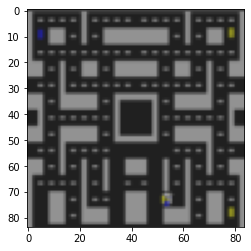

In [38]:
plt.imshow(result[-3][0].numpy().transpose((1,2,0)))

In [80]:
df['x'] = df.apply(lambda row: (int(int(row.name % 160))), axis=1)
df['y'] = df.apply(lambda row: (int(int(row.name) / 160)), axis=1)
df['pos'] = df.apply(lambda row: (row['x'], row['y']), axis=1)
df['RGB'] = df.apply(lambda row: (row['R'], row['G'], row['B']), axis=1)

In [81]:
# 전처리 time 행 열 R G B

In [82]:
df

,R,G,B,x,y,pos,RGB
0,228,111,111,0,0,"(0, 0)","(228, 111, 111)"
1,228,111,111,1,0,"(1, 0)","(228, 111, 111)"
2,228,111,111,2,0,"(2, 0)","(228, 111, 111)"
3,228,111,111,3,0,"(3, 0)","(228, 111, 111)"
4,228,111,111,4,0,"(4, 0)","(228, 111, 111)"
...,...,...,...,...,...,...,...
27184,228,111,111,144,169,"(144, 169)","(228, 111, 111)"
27185,228,111,111,145,169,"(145, 169)","(228, 111, 111)"
27186,228,111,111,146,169,"(146, 169)","(228, 111, 111)"
27187,228,111,111,147,169,"(147, 169)","(228, 111, 111)"


<AxesSubplot:xlabel='RGB', ylabel='count'>

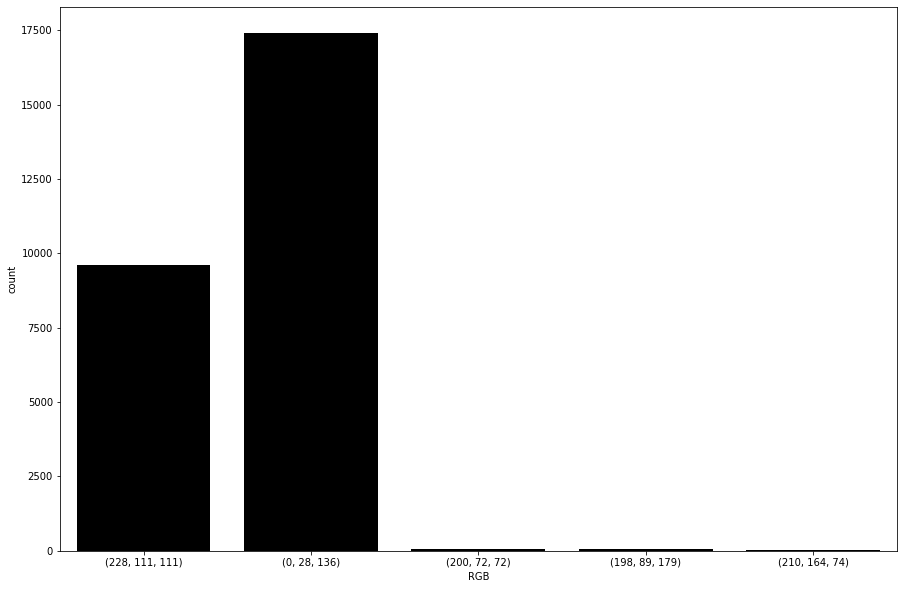

In [83]:
plt.figure(figsize=(15,10))
sns.countplot(x='RGB', data=df, color='black')

### Black

In [50]:
black = df[df['RGB'] == (0,0,0)]

In [51]:
black['y'].unique()

array([  0, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183,
       184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196,
       197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209],
      dtype=int64)

In [52]:
black[(black.y > 0) & (black.y < 172)]['x'].unique()

array([], dtype=int64)

black은 y가 0, 172 이상인 경우 존재

### Ghost 

#### Sky Blue Ghost

In [ ]:
sky_blue_ghost = df[df['RGB'] == (84, 184, 153)]
sky_blue_ghost.head()

In [ ]:
print(f"X => {sky_blue_ghost['x'].min()} ~ {sky_blue_ghost['x'].max()}")
print(f"Y => {sky_blue_ghost['y'].min()} ~ {sky_blue_ghost['y'].max()}")

size 8 X 10

#### PINK

In [ ]:
pink_ghost = df[df['RGB'] == (198, 89, 179)]
pink_ghost.head()

In [ ]:
print(f"X => {pink_ghost['x'].min()} ~ {pink_ghost['x'].max()}")
print(f"Y => {pink_ghost['y'].min()} ~ {pink_ghost['y'].max()}")

size 8 X 10

유령에 대해 정중앙 위치를 할 필요는 없을 것 같음 거리를 구하는 것도 아니기 때문에 위치는 하나의 상태 값
으로만 사용할 것이기 때문이다.

In [ ]:
env = gym.make('MsPacman-v0')
state = env.reset()

count = 0;

while True:
    env.render()
    observation, reward, done, info = env.step(env.action_space.sample())
    print(count, info)
    count += 1
    import time
    time.sleep(0.1)

유령의 위치뿐만 아니라 방향도??
이유는 유령이 꼭 플레이어와 닿을 수 있는 방향으론 움직이지 않기 때문
방향까진 무리고 위치만으로도 충분할 듯 한데

아이템을 제외하고 컬러수를 매긴다.

과자 포지션은 알고 있는게 좋음

전처리를 하는 이유는 디버깅을 좀 쉽게 할려는 이유도 있음 왜냐면 배열 형태론 사람이 못 알아보니깐
또 커스텀마이징도 가능함